# Machine Learning - KMeans - agrupamento de Dados

## Importando Bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

### Carregando a base de dados Iris

In [2]:
iris = pd.read_csv("iris.csv")

In [3]:
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


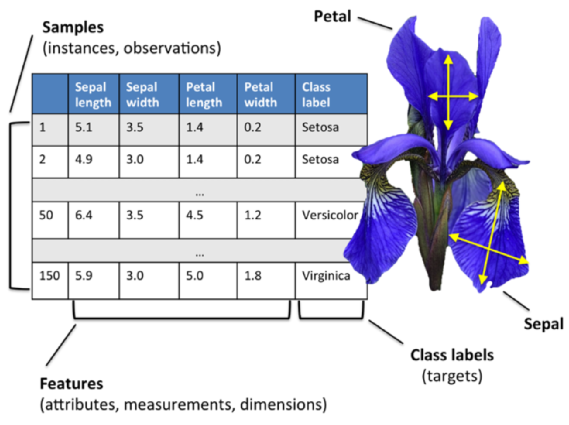

In [4]:
from IPython.display import Image
Image(filename='iris-data-set.png', width=500, height=500)

### Separando os valores de dados e classes

In [5]:
X = iris.drop('Species', axis=1)
X[:10]

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [6]:
y = iris.Species
y.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### Convertendo valores categoricos de classe em numéricos

In [7]:
def converte_classe(l):
    if l == 'Iris-virginica':
        return 0
    if l == 'Iris-versicolor':
        return 1
    if l == 'Iris-setosa':
        return 2

In [8]:
y = y.apply(converte_classe)
y.value_counts()

2    50
1    50
0    50
Name: Species, dtype: int64

### Instanciando o Algoritmo K-means com 3 clusters

In [9]:
kmeans = KMeans(n_clusters= 3, init='random')

In [10]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=3,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=None,
       tol=0.0001, verbose=0)

### Centroids

In [11]:
kmeans.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

### Tabela de Distancia

In [12]:
distance = kmeans.fit_transform(X)
distance

array([[3.41925061, 0.14694217, 5.0595416 ],
       [3.39857426, 0.43816892, 5.11494335],
       [3.56935666, 0.41230086, 5.27935534],
       [3.42240962, 0.51883716, 5.15358977],
       [3.46726403, 0.19796969, 5.10433388],
       [3.14673162, 0.68380699, 4.68148797],
       [3.51650264, 0.41520116, 5.21147652],
       [3.33654987, 0.0599333 , 5.00252706],
       [3.57233779, 0.80099438, 5.32798107],
       [3.3583767 , 0.36659514, 5.06790865],
       [3.32449131, 0.48784424, 4.89806763],
       [3.31126872, 0.25138019, 4.9966845 ],
       [3.46661272, 0.49192682, 5.19103612],
       [3.90578362, 0.90906105, 5.65173594],
       [3.646649  , 1.02019214, 5.10804455],
       [3.49427881, 1.21309192, 4.88564095],
       [3.495248  , 0.66241377, 5.03090587],
       [3.38444981, 0.1509702 , 5.02342022],
       [3.11245944, 0.82848778, 4.61792995],
       [3.37738931, 0.39898872, 4.97213426],
       [3.07471224, 0.46172719, 4.6955761 ],
       [3.31506588, 0.33762701, 4.9236821 ],
       [3.

In [13]:
distance[0]

array([3.41925061, 0.14694217, 5.0595416 ])

### Visualizando valores de distancia para cada cluster

<IPython.core.display.Javascript object>


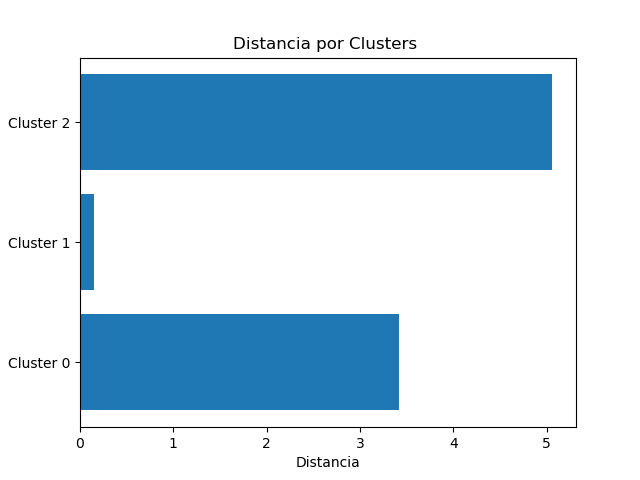

In [31]:
%matplotlib notebook
x = ['Cluster 0', 'Cluster 1', 'Cluster 2']
plt.barh(x,distance[0])
plt.xlabel('Distancia')
plt.title('Distancia por Clusters ')
plt.show()

### Imprimendo Rotulos

In [32]:
labels = kmeans.labels_
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

### Visualizando os Centroids

<IPython.core.display.Javascript object>


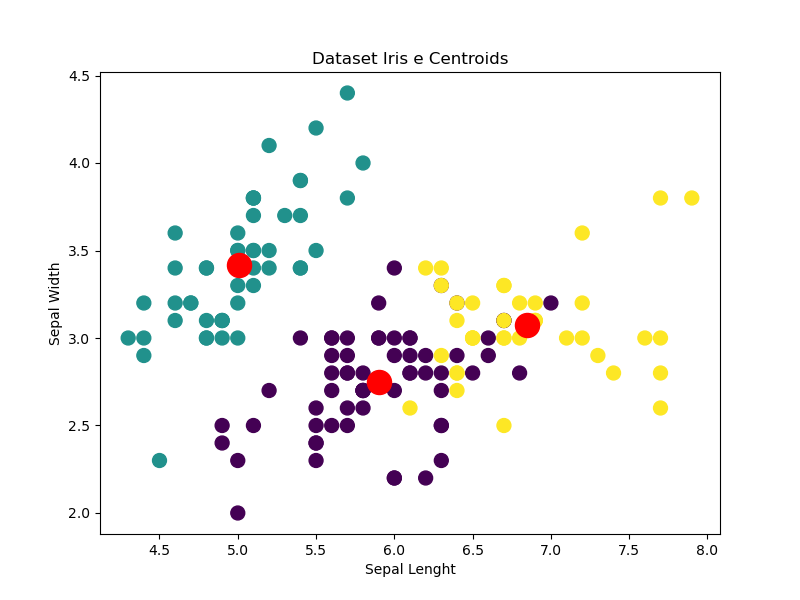

In [24]:
%matplotlib notebook
plt.figure(figsize=(8,6))
plt.scatter(X['SepalLength'], X['SepalWidth'], s = 100, c = kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 300, c = 'red', label = 'centroids')
plt.title('Dataset Iris e Centroids')
plt.xlabel('Sepal Lenght')
plt.ylabel('Sepal Width')
plt.show()

### Agrupando novos dados

In [17]:
data = [
    [4.12, 3.4, 1.6, 0.7],
    [5.2, 5.8, 5.2, 6.7],
    [3.1, 3.5, 3.3, 3.0]
]
kmeans.predict(data)

array([1, 2, 0])

### Visualizando os Resultados

<IPython.core.display.Javascript object>


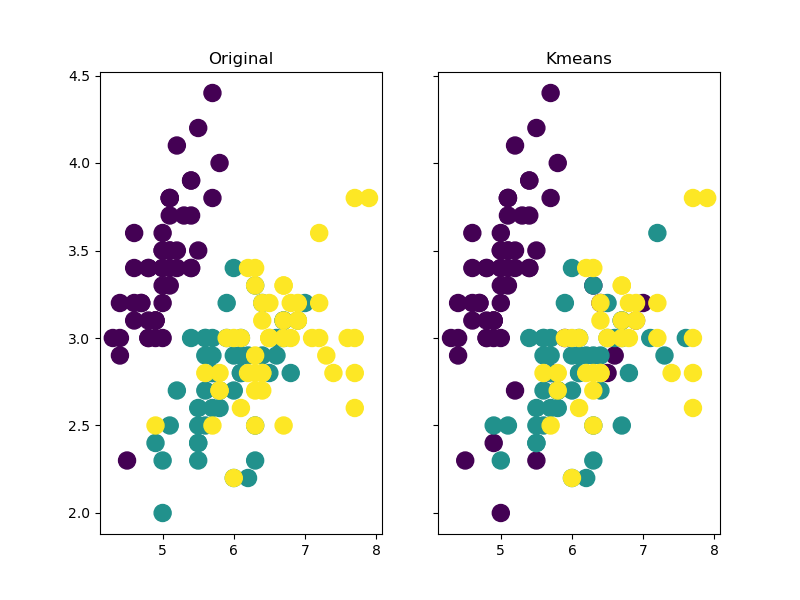

In [18]:
%matplotlib notebook
f,(ax1, ax2) = plt.subplots(1,2, sharey=True, figsize=(8,6))
ax1.set_title('Original')
ax1.scatter(X['SepalLength'], X['SepalWidth'], s=150, c=sorted(y))
ax2.set_title('Kmeans')
ax2.scatter(X['SepalLength'], X['SepalWidth'], s=150, c=sorted(kmeans.labels_))

### Estimando o valor do parametro K - Método Elbow

1 680.8244
2 152.36870647733906
3 78.94084142614602
4 57.31787321428571
5 46.53558205128205
6 38.93873974358974
7 34.46400663145228
8 29.88917890442891
9 29.189937562437564
10 26.282175324675325


<IPython.core.display.Javascript object>


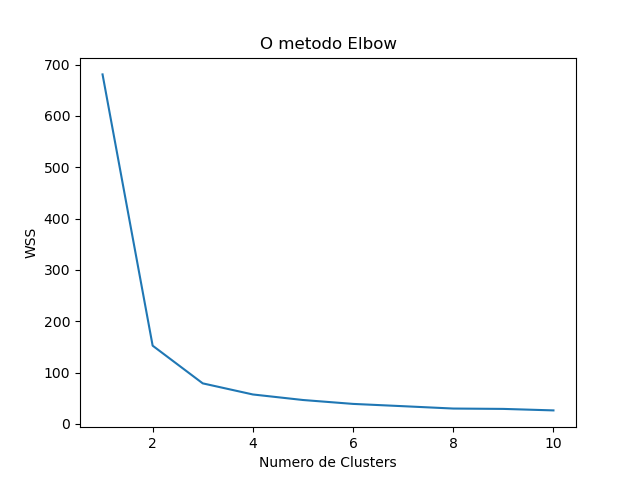

In [28]:
%matplotlib notebook
wcss = []

for i in range(1,11):
    kmeans2 = KMeans(n_clusters=i, init = 'random')
    kmeans2.fit(X)
    print(i, kmeans2.inertia_) # inertia somatória dos erros quadraticos do cluster
    wcss.append(kmeans2.inertia_)
    
plt.plot(range(1,11), wcss)    
plt.title('O metodo Elbow')
plt.xlabel('Numero de Clusters')
plt.ylabel('WSS') # within cluster sum of squares
plt.show()
    

## Técnicas de Validação

### Matriz de Confusão

In [29]:
print(pd.crosstab(y, kmeans.labels_, rownames=['Real'], colnames=['Predito'], margins=True))

Predito   0   1   2  All
Real                    
0        14   0  36   50
1        48   0   2   50
2         0  50   0   50
All      62  50  38  150


### Metricas de classificação

In [33]:
from sklearn import metrics
clusters = ['Cluster 2', 'Clusters 1', 'Clusters 0']
print(metrics.classification_report(y,kmeans.labels_, target_names=clusters))

              precision    recall  f1-score   support

   Cluster 2       0.23      0.28      0.25        50
  Clusters 1       0.00      0.00      0.00        50
  Clusters 0       0.00      0.00      0.00        50

    accuracy                           0.09       150
   macro avg       0.08      0.09      0.08       150
weighted avg       0.08      0.09      0.08       150

